<a href="https://colab.research.google.com/github/AqueeqAzam/deep-and-smart-guidance-of-neural-networks-and-deep-learning/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Deep learning`

It is a method in artificial intelligence (AI) that teaches computers to process data in a way that is inspired by the human brain.

input + weight -> summation and bias -> activation function -> output

x1*w1 -> sum(xiwi+bias) + f(x) -> output

# `Neuron and neural networks`

Human brain cells, called neurons (perceptron), form a complex, highly interconnected network and send electrical signals to each other to help humans process information.

# `Types of neural network`

perceptron, Feed Forward Network, Multi-layer Perceptron(ANN), Radial Based Network, CNN, RNN, Long Short-term memeory network

# `Single layer neural network (perceptron)`

# y = f(Σ w_i * x_i + b)

Σ (w_i * x_i): This part calculates the weighted sum.

b: The bias term (b) is added to the weighted sum. This allows the neuron to learn even when the input values are all zero.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/main/students-placement.csv")
df.head(3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
sns.scatterplot(x = df['cgpa'], y = df['iq'], data = df, hue='placed')
plt.show()

In [ ]:
x = df.iloc[:, :-1]
y = df['placed']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

from sklearn.linear_model import Perceptron
pr = Perceptron(alpha=0)
pr.fit(x_train, y_train)

pr.score(x_train, y_train)*100

placed = pr.predict([[3.5, 11, 0]])
print('Student result', placed)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# `Multi layer perceptron (ANNs)`

ANNs (Artificial Neural Networks) are helpful for solving complex problems.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/main/business-case-study.csv")
df.head(5)

df.isnull().sum()

# scaling the data
num_col = df.select_dtypes(include=np.number).columns
x = df[num_col]
y = df.iloc[:, -1]

scaler = StandardScaler()
df[num_col] = scaler.fit_transform(x)

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape



((8000, 11), (2000, 11))

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

ann = Sequential()

# units=6: This argument specifies the number of neurons in this dense layer.
ann.add(Dense(units=6, activation='relu', input_dim=11))
ann.add(Dense(units=4, activation='relu'))
ann.add(Dense(units=2, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# x_train: This represents your training data, y_train: These are the desired outputs or targets,

# Batch Size is a crucial hyperparameter that determines the number of training examples used to update the model's weights and biases in each iteration during training.

# an epoch refers to a single complete pass through your entire training dataset during the training process.

ann.fit(x_train, y_train, batch_size=64, epochs=40)

pre = ann.predict(x_test)

pre

# Convert predicted probabilities to binary predictions (0 or 1)
pre = (pre > 0.5).astype(int)

acc_score = accuracy_score(y_test, pre)
print('Accuracy of testing model is:', acc_score)


# checking accuracy of training model
pre1 = ann.predict(x_train)

# Convert predicted probabilities to binary predictions (0 or 1)
pre1 = (pre1 > 0.5).astype(int)

acc_score1 = accuracy_score(y_train, pre1)
print('Accuracy of training model is:', acc_score1)


# Backward and Forward Propogation

`Backward Propagation:` It is the process of moving from right (output layer) to left (input layer).

`Forward propagation:` It is the way data moves from left (input layer) to right (output layer) in the neural network. A neural network can be understood by a collection of connected input/output nodes.

# Activation Function

 An Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron's input to the network is important or not in the process of prediction using simpler mathematical operations.

 Linear: f(x) = x, range: - infi to +infi

 Non-linear: f(x) = x^2

 Sigmoid: pi(z) = 1/1+e^-z

 tang: f(x) = e^x + e^-x / e^x - e^-x

 ReLU: f(x) = { 0 for x<0 or x for x>= 0 }



# Loss Function

The loss function guides the training process by indicating how much the network's outputs differ from the ground truth.

By minimizing the loss function through an optimization algorithm (e.g., gradient descent), the neural network learns to adjust its internal weights and biases to produce more accurate predictions on unseen data.

`For classification:`

Binary Cross-Entropy: Used for problems with two output classes (e.g., cat vs. dog image classification).

Categorical Cross-Entropy: Used for multi-class classification problems (e.g., classifying handwritten digits 0-9).

`Regression:`

Mean Squared Error (MSE): Calculates the average squared difference between the predicted continuous values and the actual target values.

Mean Absolute Error (MAE): Similar to MSE, but it calculates the average absolute difference instead of squared differences.



# Optimizer

Its primary function is to adjust the weights and biases of the network's neurons iteratively to minimize a predefined loss function.

`Here's a breakdown of how optimizers work:`

`Loss Function:` During training, the network's predictions are compared to the actual targets (ground truth) using a loss function.

`Gradient Descent:` Optimizers utilize a technique called gradient descent to update the network's weights and biases.

`Optimizer's Role:` The optimizer uses the calculated gradients to adjust the weights and biases in a way that minimizes the loss function over time.




# improve performance of neural network

`Quality and Quantity:` Ensure you have high-quality, labeled data relevant to your task.

`Preprocessing:` Clean and normalize your data. This often involves handling missing values, scaling features to a common range.

`Complexity:` Experiment with different network architectures (number of layers, neurons per layer, activation functions) to find a suitable balance between complexity and overfitting.

`Loss Function and Metrics:` Closely monitor the training and validation loss during training.

`Regularization:` Techniques like L1/L2 regularization penalize large weights, preventing the network from overfitting by encouraging simpler models.

`Learning Rate:` The learning rate controls the magnitude of weight updates during training.

`Optimizer:` Choose an appropriate optimizer based on your problem type and network architecture.






# `Overfitting`

Overfitting is a common challenge in neural network training. It occurs when a network memorizes the specific details of the training data too closely, hindering its ability to generalize well to unseen examples.

`if training accuracy > testing accuracy:`
      return overfitting

`if training accuracy = testing accuracy`
     retrun bestfitting

`if not one of them:`
    retrun underfitting


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/main/students-placement.csv")
df.head(4)

df.isnull().sum()

# Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=['number']).columns
x = df[numerical_cols]

y = df.iloc[:, -1]

ss = StandardScaler()
ss.fit_transform(x)

x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
x

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

x_train.shape


ann = Sequential()
# Update input_dim to match the number of features in your new dataset
ann.add(Dense(units=6, activation='relu', input_dim=4))
ann.add(Dense(units=4, activation='relu'))
ann.add(Dense(units=2, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(x_train, y_train, batch_size=50, epochs=20, validation_data=(x_test, y_test))

pre = ann.predict(x_test)

# Convert predicted probabilities to binary predictions (0 or 1)
pre = (pre > 0.5).astype(int)

acc_score = accuracy_score(y_test, pre)
print('Accuracy of testing model is:', acc_score)


# checking accuracy of training model
pre1 = ann.predict(x_train)

# Convert predicted probabilities to binary predictions (0 or 1)
pre1 = (pre1 > 0.5).astype(int)

acc_score1 = accuracy_score(y_train, pre1)
print('Accuracy of training model is:', acc_score1)


# `Remove Overfitting`

`Reduce Model Complexity:`

`Smaller Networks:` A less complex network with fewer layers and neurons has less capacity to overfit.

`Regularization:` Techniques like L1/L2 regularization penalize large weights in the network, discouraging the model from becoming overly reliant on specific features.

`Training Process Optimization:`

`Learning Rate Tuning:` A high learning rate can lead to overfitting, while a low learning rate might hinder training progress.

`Improve Data Quality and Quantity:`

`High-Quality Data:` Ensure you have clean, well-labeled data relevant to the task.

`Data Augmentation:` Artificially increase the size and diversity of your dataset using techniques like random cropping, flipping, or adding noise. This helps the network learn more generalizable features.



Epoch 1/20
1/1 [==============================] - 0s 119ms/step - loss: 0.7264 - accuracy: 0.6000 - val_loss: 0.7111 - val_accuracy: 0.2500
Epoch 2/20
1/1 [==============================] - 0s 40ms/step - loss: 0.7251 - accuracy: 0.6000 - val_loss: 0.7114 - val_accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 0s 39ms/step - loss: 0.7239 - accuracy: 0.6000 - val_loss: 0.7117 - val_accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 49ms/step - loss: 0.7226 - accuracy: 0.6000 - val_loss: 0.7120 - val_accuracy: 0.2500


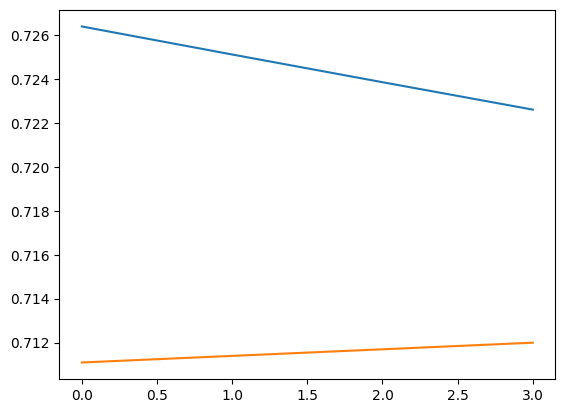

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

history = ann.fit(x_train, y_train, batch_size=50, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks) # Pass the callback to the fit method

history.history["accuracy"]
plt.plot(history.history['loss']) # Use the 'history' variable returned from the fit method
plt.plot(history.history['val_loss'])

# `Batch Normalization`

A method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras import layers
from keras import regularizers

df = pd.read_csv("https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/main/students-placement.csv")
df.head(4)

df.isnull().sum()

# Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=['number']).columns
x = df[numerical_cols]

y = df.iloc[:, -1]

ss = StandardScaler()
ss.fit_transform(x)

x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
x

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

x_train.shape


ann = Sequential()
# Update input_dim to match the number of features in your new dataset
ann.add(layers.Dense(units=6, activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
ann.add(BatchNormalization())

ann.add(layers.Dense(units=6, activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
ann.add(BatchNormalization())

ann.add(layers.Dense(units=6, activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
ann.add(BatchNormalization())

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(x_train, y_train, batch_size=50, epochs=20, validation_data=(x_test, y_test))

pre = ann.predict(x_test)

# Convert predicted probabilities to binary predictions (0 or 1)
pre = (pre > 0.5).astype(int)

acc_score = accuracy_score(y_test, pre)
print('Accuracy of testing model is:', acc_score)


# checking accuracy of training model
pre1 = ann.predict(x_train)

# Convert predicted probabilities to binary predictions (0 or 1)
pre1 = (pre1 > 0.5).astype(int)

acc_score1 = accuracy_score(y_train, pre1)
print('Accuracy of training model is:', acc_score1)


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.7518 - accuracy: 0.6000 - val_loss: 0.7785 - val_accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 56ms/step - loss: 0.7391 - accuracy: 0.6667 - val_loss: 0.7805 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 37ms/step - loss: 0.7282 - accuracy: 0.6667 - val_loss: 0.7825 - val_accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 34ms/step - loss: 0.7173 - accuracy: 0.6667 - val_loss: 0.7846 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 38ms/step - loss: 0.7066 - accuracy: 0.7333 - val_loss: 0.7867 - val_accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 0s 36ms/step - loss: 0.6959 - accuracy: 0.7333 - val_loss: 0.7888 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 42ms/step - loss: 0.6854 - accuracy: 0.7333 - val_loss: 0.7909 - val_accuracy: 0.7500
Epoch 8/20
1/1 [=============

# `Dropout Layers`

In neural networks, a dropout layer is a powerful technique used to prevent overfitting during training.

In [9]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/main/business-case-study.csv")
df.head(5)

df.isnull().sum()

# scaling the data
num_col = df.select_dtypes(include=np.number).columns
x = df[num_col]
y = df.iloc[:, -1]

scaler = StandardScaler()
df[num_col] = scaler.fit_transform(x)

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define the model
model = keras.Sequential([
  # Remove the Flatten layer since your input is not image data
  layers.Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)),
  layers.Dropout(rate=0.3),
  layers.Dense(units=64, activation='relu'),
  layers.Dense(units=1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Use binary_crossentropy for binary classification

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 106258.1094 - accuracy: 0.6726
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 27870.0352 - accuracy: 0.6729
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 13033.5449 - accuracy: 0.6740
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 10321.7090 - accuracy: 0.6730
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 6273.7349 - accuracy: 0.6814
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 7335.3887 - accuracy: 0.6729
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 5539.7798 - accuracy: 0.6640
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 3668.1064 - accuracy: 0.6715
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 1911.4436 - accuracy: 0.6762
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - l

# `Vanishing Gradient Problem`

`Consequences of Vanishing Gradients:`

`Slow Training:` The network struggles to learn, and training can become very slow.
`Poor Performance:` The network might not achieve optimal performance due to the limited learning in earlier layers.

`Addressing Vanishing Gradients:`

`Activation Functions:` Choosing activation functions that don't have vanishing gradients is crucial. ReLU (Rectified Linear Unit) is a popular choice as it has a constant gradient of 1 for positive inputs.


# `Hyperparameter Tuning`

Hyperparameter tuning is an essential process in optimizing the performance of deep learning models, especially neural networks.

Hyperparameters are settings that control the learning process of a model but are not directly learned from the training data.

Examples include:

`Learning rate:` Controls how much the weights of the model are updated during training.

`Number of epochs:` Number of times the entire training dataset is passed through the model during training.

`Network architecture: `Number and type of layers in a neural network.

`Batch size:` Number of samples used to update the model's weights in each iteration.

`Regularization parameters:` Techniques like L1/L2 regularization or dropout that control the complexity of the model and prevent overfitting.


# `CNNs`

`CNNs (Convolution Neural Networks)` It is best for solving Computer Vision-related problems.


CNN is a type of artificial neural, which is widely used for image/object recognition and classification.

`Import libraries`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

`Load Datasets`

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# ((60000, 28, 28), (60000,) ((no. of images, img_row, img_col), (labels,)

# display single image
x_train[0], y_train[0]

# display image
plt.imshow(x_train[0], cmap='gray')
plt.show()

x_train.ndim

`Feature Scaling`

In [ ]:
x_train = x_train/255
x_test = x_test/255

`Split Dataset`

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((38400, 28, 28), (9600, 28, 28), (38400,), (9600,))

`CNNs model building`

In [ ]:
model = keras.models.Sequential([keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation='relu',
    input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=2), # Changed 'MaxPooling2Dz' to 'MaxPooling2D'
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 5408)              0         
                                                                 
 dense_13 (Dense)            (None, 128)               692352    
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

`Test model`

In [ ]:

model.predict(np.expand_dims(x_test[0], axis=0)).round(2)

np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 5ms/step - loss: 0.3225 - accuracy: 0.9101


[0.3225385546684265, 0.910099983215332]

`Confusion Matrix`

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12, 8))
y_pred_label = [ np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

`Classification Report`

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_label))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.85      0.85      1000
           3       0.92      0.91      0.92      1000
           4       0.87      0.84      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.74      0.77      0.75      1000
           7       0.98      0.94      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



`Save model`

In [ ]:
model.save('fashion_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# `RNNs`

`RNNs (Recurrent Neural Networks):` It is proficient in Natural Language Processing.

Mark work for Facebook in America

Person -> Mark

0 -> work

0 -> for

organization -> Facebook

0 -> in

location -> America


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense

# Sequence length (number of timesteps)
sequence_length = 10
# Number of features in each timestep
num_features = 4
# Number of units in the RNN layer
num_units = 8

# Generate random data for sequences
# Adjust the number of samples to a reasonable amount for training
num_samples = 100
data = tf.random.uniform((num_samples, sequence_length, num_features))

# Create labels (example: predicting the sum of features at each timestep)
y = tf.reduce_sum(data, axis=2)

# Split data into training and validation sets
split_index = int(num_samples * 0.8)
x_train, x_val = data[:split_index], data[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

model = tf.keras.Sequential([
  SimpleRNN(num_units, return_sequences=True, input_shape=(sequence_length, num_features)),  # Process entire sequence
  SimpleRNN(num_units),  # Second RNN layer (optional)
  Dense(1)  # Output layer (adjust for your task)
])


model.compile(loss='mse', optimizer='adam')  # Mean squared error loss for simplicity

# Use the training data (x_train, y_train) and validation data (x_val, y_val)
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)


# New sequence for prediction
new_data = tf.random.uniform((1, sequence_length, num_features))
prediction = model.predict(new_data)
print('Prediction of model is:', prediction)

Epoch 1/10
3/3 [==============================] - 6s 368ms/step - loss: 2.1942 - val_loss: 1.5685
Epoch 2/10
3/3 [==============================] - 0s 51ms/step - loss: 1.6330 - val_loss: 1.2287
Epoch 3/10
3/3 [==============================] - 0s 46ms/step - loss: 1.2445 - val_loss: 0.9728
Epoch 4/10
3/3 [==============================] - 0s 53ms/step - loss: 0.9799 - val_loss: 0.7864
Epoch 5/10
3/3 [==============================] - 0s 49ms/step - loss: 0.7981 - val_loss: 0.6507
Epoch 6/10
3/3 [==============================] - 0s 47ms/step - loss: 0.6770 - val_loss: 0.5536
Epoch 7/10
3/3 [==============================] - 0s 45ms/step - loss: 0.5911 - val_loss: 0.4855
Epoch 8/10
3/3 [==============================] - 0s 39ms/step - loss: 0.5451 - val_loss: 0.4380
Epoch 9/10
3/3 [==============================] - 0s 45ms/step - loss: 0.5126 - val_loss: 0.4070
Epoch 10/10
1/1 [==============================] - 1s 644ms/step
Prediction of model is: [[1.7865866]]


# Have a nice day